In [16]:
import fastai
from fastai.vision.all import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

## Data Import

In [17]:
PATH = "/kaggle/input/leapgestrecog/leapGestRecog"
RANDOM_STATE = 42
TEST_SIZE = 0.3
IMG_SIZE = 128

In [18]:
data = DataBlock(
                blocks=(ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter=RandomSplitter(valid_pct=TEST_SIZE, seed=RANDOM_STATE),
                get_y = parent_label,
                item_tfms = Resize(IMG_SIZE)
)

In [19]:
dataloaders = data.dataloaders(PATH, bs=64)

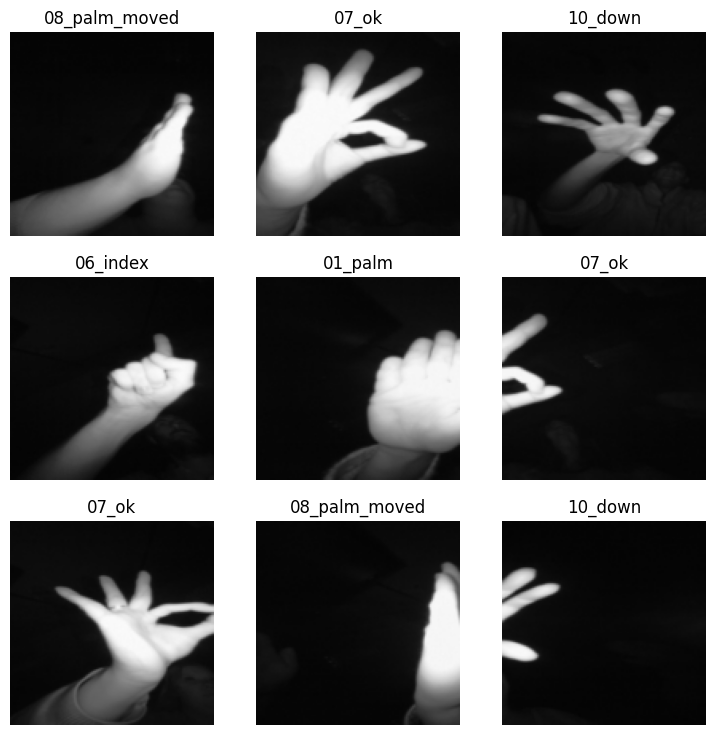

In [20]:
dataloaders.show_batch()

In [21]:
learn = vision_learner(dataloaders, resnet34, metrics = error_rate)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0014454397605732083)

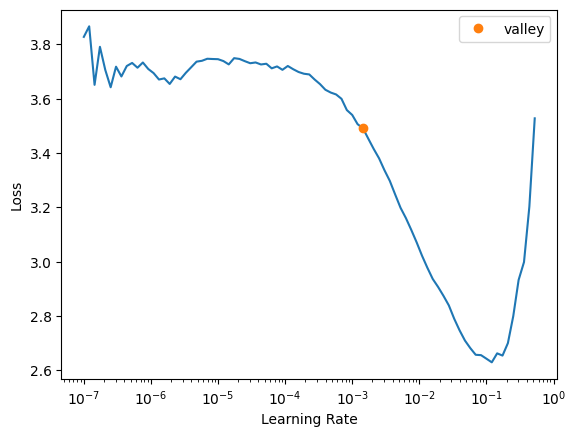

In [22]:
learn.lr_find()

In [23]:
learn.fine_tune(4, 3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.930956,0.060276,0.016333,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.692362,0.100255,0.026500,01:29
1,0.446554,0.018415,0.006000,02:17
2,0.275292,0.001212,0.000000,02:18
3,0.174264,0.001033,0.000167,02:19


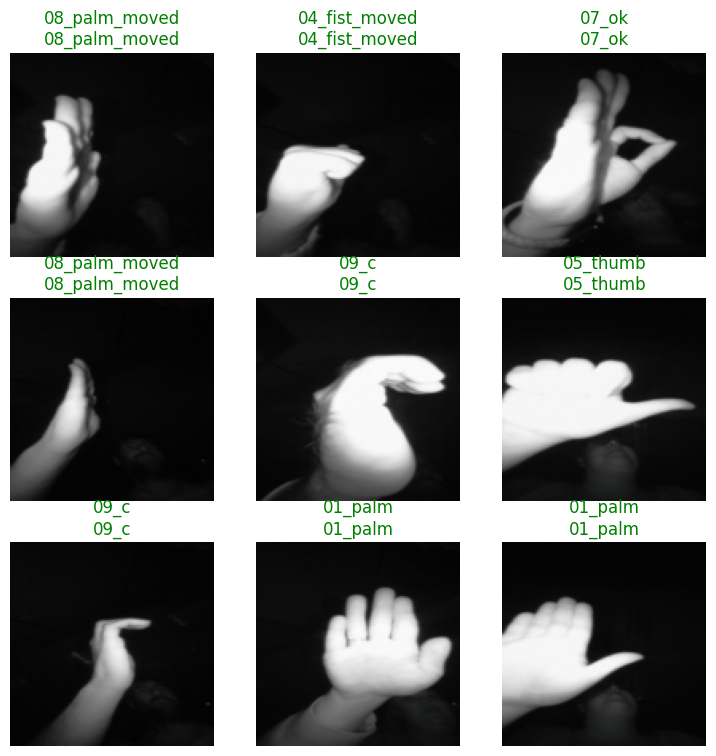

In [24]:
learn.show_results()

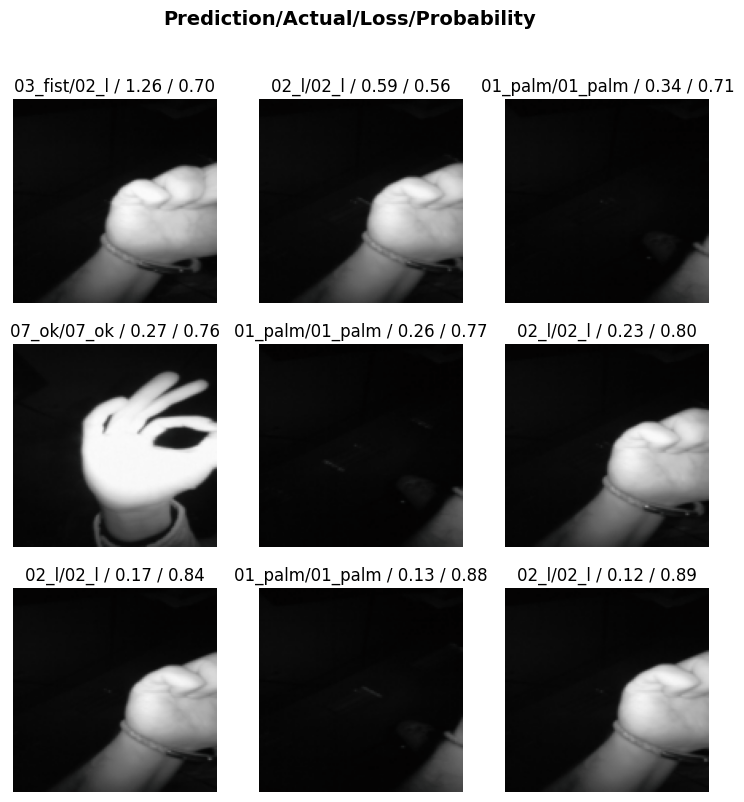

In [25]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [26]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [27]:
learn.export("model-r34")